## Project 2. Clustering using k-means

### Student ID: 915030521
### Student Name: Chenghan Sun

In [1]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
import math
import matplotlib.pyplot as plt

# Do not use any other packages below here in your code before part 4
# install Basemap before you start

import pandas as pd
# from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Part 1. Implementing k-means algorithm

Complete what is missing to implement the k means algorithm.

In [74]:
class k_means:
    
    def __init__(self, data: np.ndarray, d: int, k: int , tol: float, max_iter: int):
        """
        data: data to cluster
        d:dimension of the data
        k: prespecified number of clusters
        tol: convergence criterion
        max_iter: maximum number of iterations allowed
        """
        self.partitions={i:[] for i in range(k) }
        self.labels=[] # list of numbers with values from 0 to k-1
        self.d=d
        self.n=data.shape[0]  # num of samples: 180
        self.counter=0
    
        ### your code starts here
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.data = data
        # self.update_flag = True
        self.centers = None
        self.cost = 0
        ### end of your code
    
    def initialize_centers(self, method: int):
        """
        method = 1:
        randomly pick k points from the data as centers
        """
        if method==0:
            self.centers=data[:self.k,:]
            
        elif method==1:
        ### your code starts here
            # K initial centers are generated at random
            # select random data points w/o replacement
            self.set_k(self.k)
            rand_index = np.random.choice(self.n, self.k, replace=False) 
            self.centers = self.data[rand_index, :]
            return self.centers
        else:
            raise ValueError("Method needs to be either 0 or 1")
        ### end of your code
        
    def search(self):
        """
        update the partitions and the next centers;
        here we use centroids for k-means method
        """
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=np.array([])
        
        ### your code starts here
        # update the partitions
        for sample in range(self.n):  # loop through all the samples
            closest_samples = []  # initialize closest samples as a list
            for center in range(self.centers.shape[0]):  # loop through all picked centers
                euc_dist = np.linalg.norm(self.data[sample] - self.centers[center])
                closest_samples.append(euc_dist)
            
            # closest_index = np.argmin(closest_samples) 
            target_sample = np.min(closest_samples)  # use for minimum index checker 
            # get the index/indicies of closest sample
            closest_index = [i for i,j in enumerate(closest_samples) if j == target_sample] 
            
            # in case of multiple closest indicies
            if len(closest_index) != 1:  
                closest_index = int(np.random.choice(closest_index, 1))
            self.partitions[closest_index[0]].append(sample)  # update new partitions
            
        # update the next centers
        next_centers_list = []  # list of new centers 
        for i in range(len(self.centers)):  # loop through the number of clusters
            partitions_index = self.partitions[i]
            selected_centers = self.data[partitions_index]  # find each new "center"
            mean_dist = np.mean(selected_centers, axis=0)
            next_centers_list.append(mean_dist)
        self.next_centers = np.array(next_centers_list)  # form the new centers 
        ### end of your code
        
    def is_updated(self):
        """
        return True if update is done, but has not yet converged; False otherwise;
        the convergence criterion is the sum of absolute relative differences (between self.centers and 
        self.next_centers) smaller than tol
        """
        
        ### your code starts here
        converge_criterion = np.linalg.norm((self.centers - self.next_centers), ord=1)
        #if not self.update_flag:
        #    print("Update_flag needs to be defaulted as True")
            
        if converge_criterion > self.tol:
            return True
        else:
            #self.update_flag = False
            return False
        ### end of your code
        
    def fit_model(self):
        """
        function to fit the k-means algorithms using the above functions
        """
        self.initialize_centers(1)  # method = 1 
        ### your code starts here
        for it in range(self.max_iter):  # perform iterations 
            self.search()
            # print(self.update_flag)
            if not self.is_updated():
                print(f"The K-means algorithm is converged at iteration number = {it}")
                break
            self.centers = self.next_centers  # update new center
        ### your code ends here
        self.get_labels()

    def set_k(self,k):
        self.k=k
    
    # not used but changed as Lingfei mentioned 
    def predict(self,pt):
        distances = [ numpy.linalg.norm( pt-c ) for c in self.centers ]
        cluster_label = distances.index( min(distances) )
        return cluster_label

    def get_labels(self):
        ### your code starts here
        self.labels = np.empty(self.n)
        for center in range(len(self.centers)):  # loop through all picked centers
            # print(self.partitions[center])
            for closest_index in self.partitions[center]:
                self.labels[closest_index] = center  # assign labels 
        self.labels = np.array(self.labels)
        ### end of your code
        return self.labels
    
    def get_centers(self):
        return self.centers
    
    def get_clusters(self):
        return self.partitions

    def get_cost(self):
        """
        Here we use within cluster sum of squares as cost 
        """
        ### your code starts here
        self.cost = 0  # reset cost for cost plot 
        for sample in range(self.n):  # loop through all the samples
            label = int(self.labels[sample])  # label index
            iter_cost = sum((self.data[sample] - self.centers[label])**2)
            self.cost += iter_cost
        ### end of your code
        return self.cost
        
    def plot_clusters(self):
        if self.d>2:
            print("Dimension too large!")
            return 
        if self.labels==[]:
            self.fit_model()
        plt.scatter( self.data[:,0] , self.data[:,1], c=self.labels, s=3)
        plt.scatter( np.array(self.centers)[:,0],np.array(self.centers)[:,1] ,marker='*',c=list(range(self.k)) ,s=300 )

## Part 2. Implementing criteria to evaluate clustering algorithms

In [75]:
class clustering_eval_metrics:
    def __init__(self, labels: list ,true_labels=None): # label must be between 0 to number_of_labels - 1
        self.labels=np.array(labels)
        self.true_labels=true_labels
        self.cmat=None
        self.ars=None
        
    def set_true_labels(self, true_labels):
        self.true_labels=np.array(true_labels)
        
    def contingency_matrix(self): 
        """
        return a contingency matrix
        """
        ### your code starts here
        # here I referred sklearn.metrics.cluster.contingency_matrix to build my own contingency matrix
        pred_clusters, pred_cluster_index = np.unique(self.labels, return_inverse=True)  # return the indices of ar
        true_clusters, true_clusters_index = np.unique(self.true_labels, return_inverse=True)  # return the indices of ar
        num_pred_clusters = pred_clusters.shape[0]  # get dimension sample size 
        num_true_clusters = true_clusters.shape[0]  # get dimension sample size
        
        # initialize the contingency matrix
        if num_pred_clusters >= num_true_clusters:
            n_clusters = num_pred_clusters
        else:
            n_clusters = num_true_clusters
        self.cmat = np.zeros((n_clusters, n_clusters))
        
        # fill-in the contingency matrix
        for pos in range(len(true_clusters_index)):
            self.cmat[true_clusters_index[pos], pred_cluster_index[pos]] += 1
        ### end of your code
        
        return self.cmat
        
    def adjusted_rand_score(self):
        """
        return ARI/ARS
        """
        ### your code starts here
        # firstly, check input dimensions 
        if self.labels.ndim != 1:
            raise ValueError(
                f"labels_pred must be 1D: shape is: {labels_pred.shape}")
        if self.true_labels.ndim != 1:
            raise ValueError(
                f"labels_true must be 1D: shape is: {labels_true.shape}")
        
        # get labels dimentionalities, similar steps as building contingency_matrix
        num_samples = self.true_labels.shape[0]
        pred_clusters = np.unique(self.labels)
        num_pred_clusters = pred_clusters.shape[0]
        true_clusters = np.unique(self.true_labels)
        num_true_clusters = true_clusters.shape[0]
        
        # Here I referred sklearn.metrics.adjusted_rand_score to for ARI calculation
        # Check special limit cases: no clustering or
        # trivial clustering where each document is assigned a unique cluster,
        # which refers perfect matching case hence return 1
        #if (num_true_clusters == num_pred_clusters == 1 or num_true_clusters == num_pred_clusters == 0 \
        #    or num_true_clusters == num_pred_clusters == num_samples):
        #    return 1
        #else:
        #    self.cmat = self.contingency_matrix()
            
        # calculate ARI using the contingency matrix 
        # using the equation of adjusted Rand index 
        # make a sub-helper function
        def _helper_comb(n):
            return n*(n-1)/2

        # Here I referred sklearn.metrics.adjusted_rand_score to for ARI calculation
        sum_comb_1 = sum(_helper_comb(n1) for n1 in np.ravel(self.cmat.sum(axis=1)))
        sum_comb_2 = sum(_helper_comb(n2) for n2 in np.ravel(self.cmat.sum(axis=0)))
        comb_mean = (sum_comb_1 + sum_comb_2) / 2
        comb_prod = (sum_comb_1 * sum_comb_2) / _helper_comb(num_samples)

        # last component: calculate summation of combinations by loops 
        sum_comb = 0  # initialize summation of combinations
        for i in range(len(self.cmat)):
            for j in range(len(self.cmat[0])):
                component = self.cmat[i][j]
                sum_comb += _helper_comb(component)

        self.ars = (sum_comb - comb_prod) / (comb_mean - comb_prod)
        ### end of your code
        return self.ars

## Part 3. k-medoid algorithm

Write a class called pam to implement the k-medoid algorithm. It should have a similar structure as the k_means class as we implemented before. Write the code as concise as possible. Any code that exceeds 40 lines will get penalized.

pam should take one more parameter p. the input will look like

(data: numpy.ndarray, d: int, k: int , tol: float, max_iter: int, p: float)

p indicates whtat Lp norm is used. $ |x|_{L_p}=( x_1^p+\ldots+x_d^p  )^{1/p}  $

In [76]:
### Your code starts here
# In order to control the code within 40 lines, design a new pam class to inherit features from the K-means class 
class pam(k_means):
    def __init__(self, data: np.ndarray, d: int, k: int , tol: float, max_iter: int, p: float):
        super().__init__(data, d, k, tol, max_iter)
        self.p = p
        
    def search(self):
        self.partitions={i:[] for i in range(self.k)}
        self.next_centers=np.array([])
        # update the partitions
        for sample in range(self.n):  # loop through all the samples
            closest_samples = []  # initialize closest samples as a list
            for center in range(self.centers.shape[0]):  # loop through all picked centers
                euc_dist = np.linalg.norm(self.data[sample] - self.centers[center])
                closest_samples.append(euc_dist)
            
            # closest_index = np.argmin(closest_samples) 
            target_sample = np.min(closest_samples)  # use for minimum index checker 
            # get the index/indicies of closest sample
            closest_index = [i for i,j in enumerate(closest_samples) if j == target_sample] 
            
            # in case of multiple closest indicies
            if len(closest_index) != 1:  
                closest_index = int(np.random.choice(closest_index, 1))
            self.partitions[closest_index[0]].append(sample)  # update new partitions
            
        # update the next centers
        next_centers_list = []  # list of new centers 
        for i in range(len(self.centers)):  # loop through the number of clusters
            partitions_index = self.partitions[i]
            selected_centers = self.data[partitions_index]  # find each new "center"
            mean_dist = np.median(selected_centers, axis=0)
            next_centers_list.append(mean_dist)
        self.next_centers = np.array(next_centers_list)  # form the new centers 

### your code ends here

## Part 4. Simulation Study 

### You may choose not to use the functions written above to finish this part. Then, you automatically lose all the points from Part 1~3.

Sample $60$ data points each from the following distributions each

$$ X_1\sim N\bigg(\begin{pmatrix}
0\\
0\end{pmatrix},\begin{pmatrix}
1 & 0\\
0 & 1 \end{pmatrix}\bigg),X_2\sim N\bigg(\begin{pmatrix}
3\\
2\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg)
, X_3\sim N\bigg(\begin{pmatrix}
5\\
0\end{pmatrix},\begin{pmatrix}
2 & 1\\
1 & 1 \end{pmatrix}\bigg) $$

to form a sample of size $180$.  Use numpy.random.multivariate_normal() and set numpy.random.seed(20) in front.

In [77]:
data=np.array([])
true_labels=np.array([])

### your code starts here
np.random.seed(20)  # set seed as required 

# begin simulation data 
sample = 60
X1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]], sample)
X2 = np.random.multivariate_normal([3,2], [[2,1], [1,1]], sample)
X3 = np.random.multivariate_normal([5,0], [[2,1], [1,1]], sample)

# insert into given data container 
data = np.concatenate([X1, X2, X3], axis=0)
print(f"Shape of the sample size = {data.shape}")
# print(data[0, :])

true_labels = np.concatenate([[0]*sample,[1]*sample,[2]*sample])
# print(true_label)
### your code ends here

Shape of the sample size = (180, 2)


### 4.1 Apply k-means method (set k=3) to the simulated data set. Plot different clusters and their centers. Also calculate the adjusted rand score.

The K-means algorithm is converged at iteration number = 7
It's reported the adjusted rand score of my K-means algorithm = 0.7382334038133738


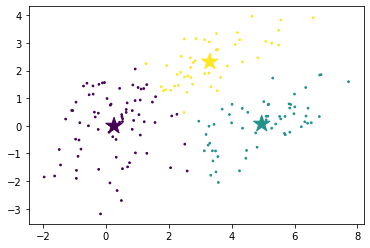

In [78]:
global_k = 3
KMs = k_means(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100)

# plot
KMs.plot_clusters()
pred_label = KMs.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-means algorithm = {KMs_metrics.adjusted_rand_score()}")

### 4.2a Apply pam method (set k=3) to the simulated data set. Plot different clusters and their centers using the L_p "norm" when p=.1 and p=2. Also calculate the adjusted rand score.

The K-means algorithm is converged at iteration number = 6
It's reported the adjusted rand score of my K-medoid algorithm with p = 0.1 is 0.38038852214046565


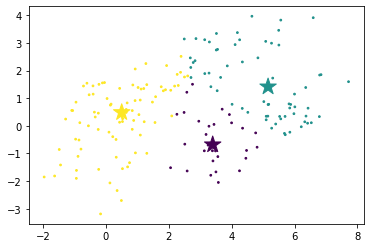

In [79]:
k_medoid_1 = pam(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100, p = 0.1)

# plot
k_medoid_1.plot_clusters()
pred_label = k_medoid_1.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-medoid algorithm with p = 0.1 is {KMs_metrics.adjusted_rand_score()}")

The K-means algorithm is converged at iteration number = 4
It's reported the adjusted rand score of my K-medoid algorithm with p = 2.0 is  0.7240565469926695


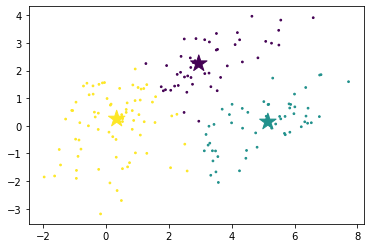

In [80]:
k_medoid_2 = pam(data = data, d = data.shape[1], k = global_k, tol = 0.01, max_iter = 100, p = 2.0)

# plot
k_medoid_2.plot_clusters()
pred_label = k_medoid_2.labels
# print(pred_label)

# report adjusted rand score (ARS)
KMs_metrics = clustering_eval_metrics(pred_label, true_labels)
KMs_metrics.contingency_matrix()
print(f"It's reported the adjusted rand score of my K-medoid algorithm with p = 2.0 is  {KMs_metrics.adjusted_rand_score()}")

### 4.2b Can you compare these results and analyze the cause of the difference?

### 4.3 How to choose k? First interpret the plot that you get from the code below, then come up with a procedure using this plot to find a k. What's k you would like to use? Explain why.

The K-means algorithm is converged at iteration number = 1
The K-means algorithm is converged at iteration number = 7
The K-means algorithm is converged at iteration number = 4
The K-means algorithm is converged at iteration number = 5
The K-means algorithm is converged at iteration number = 4
The K-means algorithm is converged at iteration number = 7
The K-means algorithm is converged at iteration number = 5
The K-means algorithm is converged at iteration number = 8
The K-means algorithm is converged at iteration number = 10
The K-means algorithm is converged at iteration number = 17
The K-means algorithm is converged at iteration number = 12
The K-means algorithm is converged at iteration number = 5
The K-means algorithm is converged at iteration number = 13
The K-means algorithm is converged at iteration number = 5
The K-means algorithm is converged at iteration number = 9


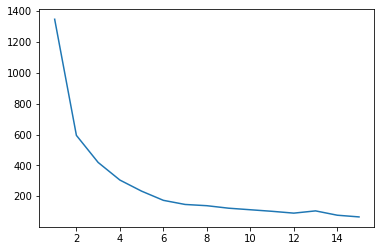

In [81]:
wcss=[]
km = k_means(data, 2, 1, 1e-7, 500)
for i in range(1,16):
    km.k = i
    km.fit_model()
    wcss.append(km.get_cost())
plt.plot(list(range(1,16)), wcss)

## Part 5. Segment Analysis


### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

In [ ]:
filename='weather.csv'
df = pd.read_csv(filename)
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)
df.head(5)

### Visualization of the data

In [ ]:
rcParams['figure.figsize'] = (14,10)
llon=-140
ulon=-50
llat=40
ulat=65
df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()


## this is to change longitude and latitude to coordinates

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

# plot the stations on the map
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

### In the following, you'll work on two datasets data1 (segmentation based on location data only) and data2 (segmentation based on location data as well as the temperature data) to perform k means methods with an appropriate k to do clustering and then label the clusters on two separate maps. You need to justify every decisions you make by appropriate plots or reasoning. 

In [ ]:
## do not change anything in this block
data1= df[['xm','ym']].to_numpy()
data2 = df[['xm','ym','Tx','Tm','Tn']].to_numpy()

data1 = np.nan_to_num(data1)
data1 = StandardScaler().fit_transform(data1)
data2 = np.nan_to_num(data2)
data2 = StandardScaler().fit_transform(data2)

### Add your code for problem 3 from part B below.

In [ ]:
# Load the data - see notebook on "Dimension Reduction, PCA, kernel PCA, Part 1"

# put your code here



In [ ]:
# Peform hierarchical clustering on the states using complete linkage clustering 
# (using Euclidean distance) and plot the corresponding denrogram



In [ ]:
# Find the states in each cluster and print them



In [ ]:
# Now standardize the data and perform hierarchical clustering as above



In [ ]:
# Find a "reasonable" partition by considering the dedrogram

**Put your answer to Problem 3, part (d) here:**



## <font color="blue"> Submit both a pdf file and your original jupyter notebook on canvas.</font>